Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

def read_images_and_masks(image_dir, mask_dir):
    images = []
    masks = []
    
    image_files = os.listdir(image_dir)
    
    for filename in image_files:
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        
        mask_filename = filename.split('.')[0] + '.png' 
        
        mask_path = os.path.join(mask_dir, mask_filename)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) 
        
        images.append(image)
        masks.append(mask)
        
    return images, masks

image_dir = 'Dataset/Lung CT images/Lung CT images'
mask_dir = 'Dataset/Annotations/Annotations'

images, masks = read_images_and_masks(image_dir, mask_dir)

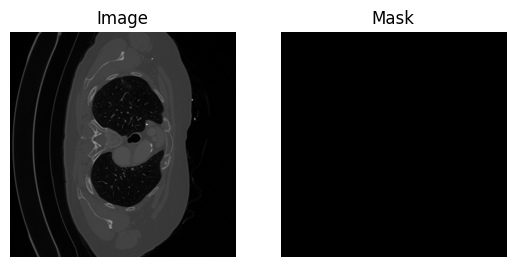

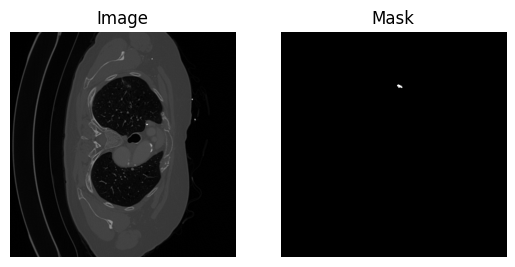

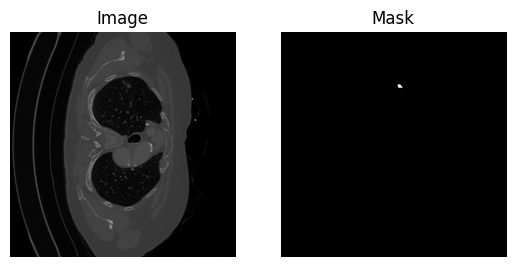

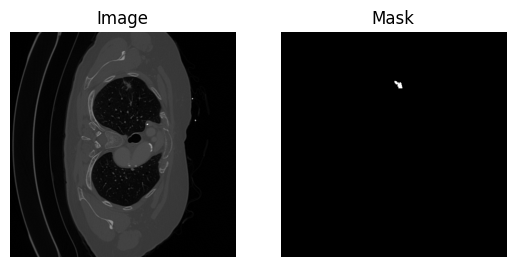

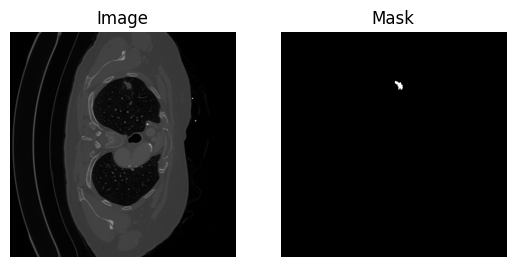

In [3]:
num_images = 5
for i in range(num_images):
    plt.subplot(1, 2, 1)
    plt.imshow(images[i])
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(masks[i], cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    
    plt.show()

Image Processing

In [4]:
import cv2
import numpy as np

def preprocess_image(image, target_size):
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255.0
    
    return image

def preprocess_data(images, masks, image_size, num_classes=None):
    preprocessed_images = []
    
    for image, mask in zip(images, masks):
        preprocessed_image = preprocess_image(image, image_size)
        preprocessed_images.append(preprocessed_image)
    
    return np.array(preprocessed_images), np.array(masks)

image_size = (256, 256)  
num_classes = 0  
preprocessed_images, preprocessed_masks = preprocess_data(images, masks, image_size, num_classes)

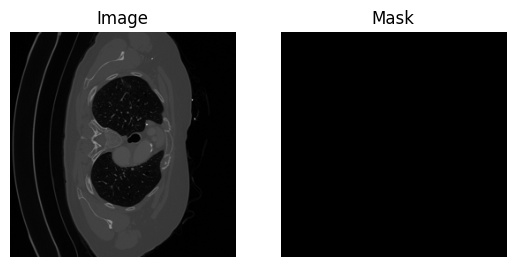

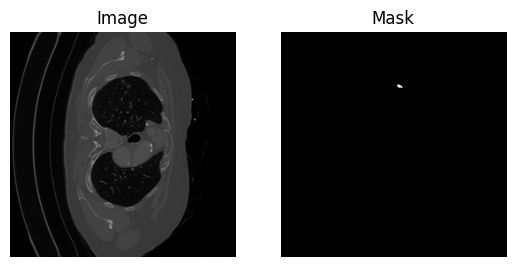

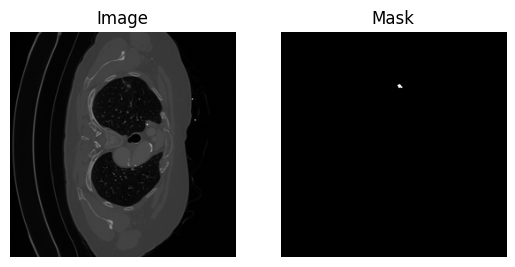

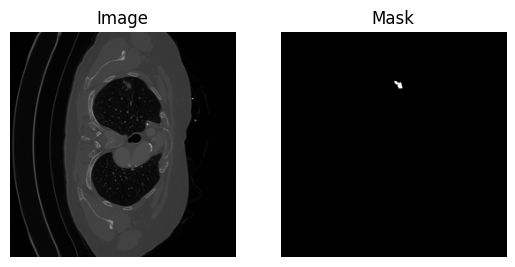

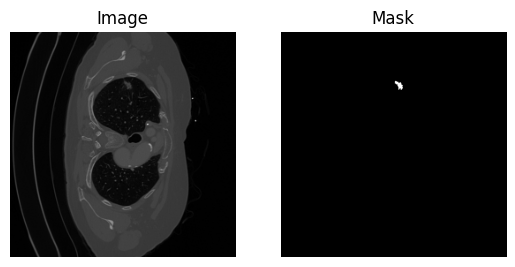

In [5]:
num_images = 5
for i in range(num_images):
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_images[i])
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_masks[i], cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    
    plt.show()

Annotation/Mask Processing

In [6]:
import os

def get_image_names(image_dir):
    image_names = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            image_names.append(filename)
    return image_names

image_dir = 'Dataset/Annotations/Annotations'
image_names = get_image_names(image_dir)
print(image_names)

['lung_001_slice231.png', 'lung_001_slice232.png', 'lung_001_slice233.png', 'lung_001_slice234.png', 'lung_001_slice235.png', 'lung_001_slice236.png', 'lung_001_slice237.png', 'lung_001_slice238.png', 'lung_001_slice239.png', 'lung_001_slice240.png', 'lung_001_slice241.png', 'lung_001_slice242.png', 'lung_001_slice243.png', 'lung_001_slice244.png', 'lung_001_slice245.png', 'lung_001_slice246.png', 'lung_001_slice247.png', 'lung_001_slice248.png', 'lung_001_slice250.png', 'lung_003_slice138.png', 'lung_003_slice139.png', 'lung_003_slice140.png', 'lung_003_slice141.png', 'lung_003_slice142.png', 'lung_003_slice143.png', 'lung_003_slice144.png', 'lung_003_slice145.png', 'lung_003_slice146.png', 'lung_003_slice147.png', 'lung_004_slice217.png', 'lung_004_slice218.png', 'lung_004_slice219.png', 'lung_004_slice220.png', 'lung_004_slice221.png', 'lung_004_slice222.png', 'lung_004_slice223.png', 'lung_004_slice224.png', 'lung_004_slice225.png', 'lung_004_slice226.png', 'lung_004_slice227.png',

In [7]:
import cv2

def resize_images(images):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_NEAREST)
        resized_images.append(resized_image)
    return resized_images
resized_images = resize_images(preprocessed_masks)
preprocessed_masks=resized_images

In [8]:
preprocessed_masks=np.array(preprocessed_masks)
preprocessed_masks=preprocessed_masks.reshape(1657, 256,256,1)

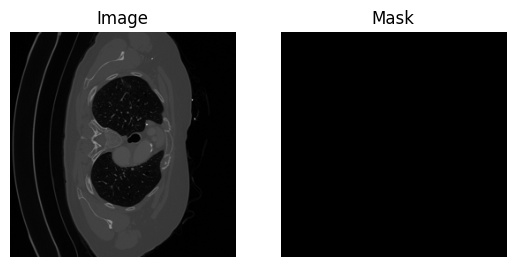

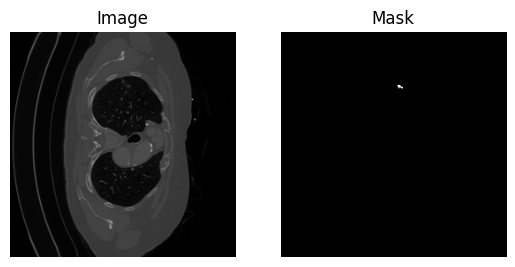

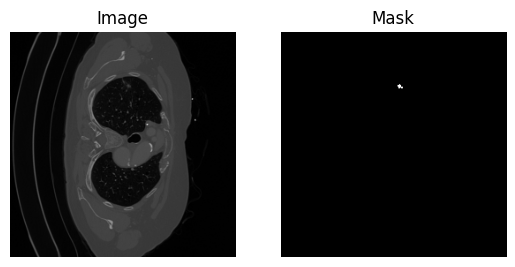

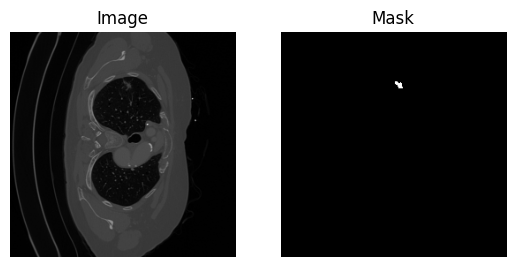

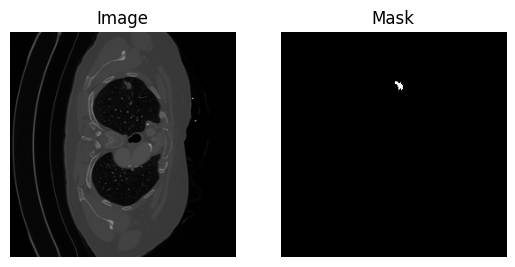

In [9]:
num_images = 5
for i in range(num_images):
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_images[i])
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_masks[i], cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    
    plt.show()

In [10]:
import numpy as np
import cv2

def load_data(image_paths, mask_paths):
    images = []
    masks = []
    for x in range(len(image_paths)):
        img=image_paths[x]
        mask=mask_paths[x]
        mask = (mask > 0).astype(np.float32)

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

preprocessed_images, preprocessed_masks = load_data(preprocessed_images, preprocessed_masks)

print("Image min/max values:", preprocessed_images.min(), preprocessed_images.max())
print("Mask min/max values:", preprocessed_masks.min(), preprocessed_masks.max())

Image min/max values: 0.0 1.0
Mask min/max values: 0.0 1.0


In [13]:
preprocessed_images.shape

(1657, 256, 256, 3)

In [14]:
preprocessed_masks.shape

(1657, 256, 256, 1)

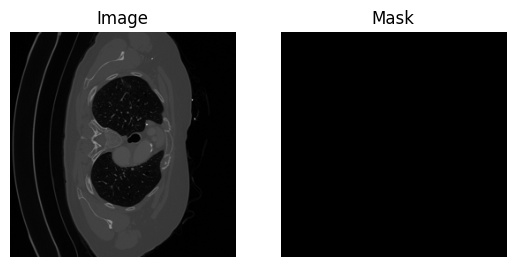

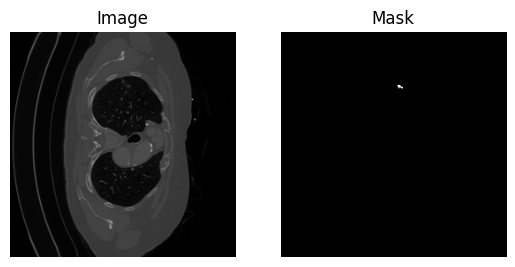

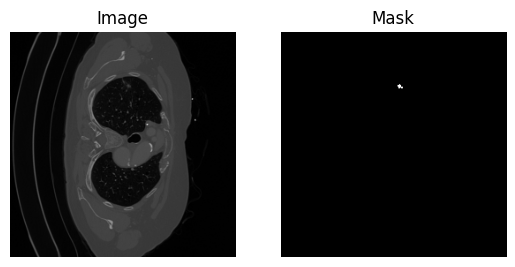

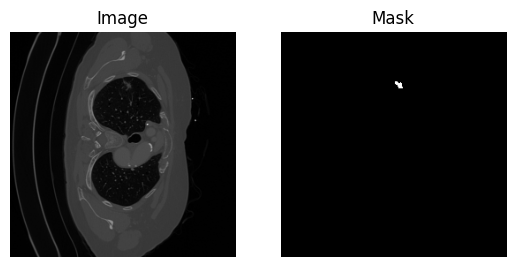

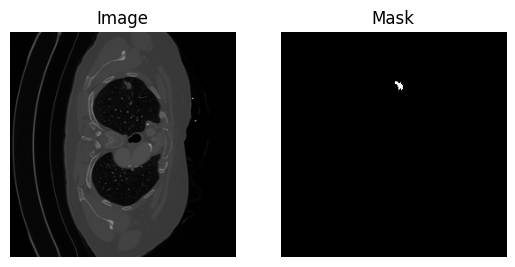

In [11]:
num_images = 5
for i in range(num_images):
    plt.subplot(1, 2, 1)
    plt.imshow(preprocessed_images[i])
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_masks[i], cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    
    plt.show()

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

images_dir = 'Dataset_Processed/images/'
masks_dir = 'Dataset_Processed/masks/'

os.makedirs(images_dir, exist_ok=True)
os.makedirs(masks_dir, exist_ok=True)

def save_images(images, output_dir):
    for i, image in enumerate(images):
        image = (image * 255).astype(np.uint8)
        img_name = f'{i}.jpg'
        plt.imsave(os.path.join(output_dir, img_name), image)

save_images(preprocessed_images, images_dir)

print("Images saved successfully.")

Images saved successfully.


In [16]:
import os
import numpy as np
import cv2

def save_masks(mask_array, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for i, mask in enumerate(mask_array):
        if mask.shape[-1] == 1:
            mask = np.squeeze(mask, axis=-1)

        mask_img = np.uint8(mask * 255)  

        if mask_img.shape[:2] != (256, 256):
            mask_img = cv2.resize(mask_img, (256, 256), interpolation=cv2.INTER_NEAREST)

        cv2.imwrite(os.path.join(output_directory, f'{i}.jpg'), mask_img)
masks_dir = 'Dataset_Processed/masks/'

save_masks(preprocessed_masks, masks_dir)


In [51]:
import cv2
import os
import pandas as pd

def find_nodule_coordinates(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    _, binary_mask = cv2.threshold(mask, 240, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    nodules = []
    class_labels = []
    
    if len(contours) == 0:

        return [(0, 0, 0, 0)], [0]
    
    for contour in contours:

        x, y, w, h = cv2.boundingRect(contour)

        image_height, image_width = mask.shape[:2]
        center_x = (x + w / 2) / image_width
        center_y = (y + h / 2) / image_height
        width = w / image_width
        height = h / image_height
        
        nodules.append((center_x, center_y, width, height))
        class_labels.append(1)  
    
    return nodules, class_labels

def process_mask_files(mask_dir):
    data = {'Mask File': [], 'Nodule Coordinates': [], 'Class Label': []}
    
    for mask_filename in os.listdir(mask_dir):
        if mask_filename.endswith('.jpg'):
            mask_path = os.path.join(mask_dir, mask_filename)
            nodules, class_labels = find_nodule_coordinates(mask_path)
            
            data['Mask File'].append(mask_filename.replace('.jpg', ''))
            data['Nodule Coordinates'].append(nodules)
            data['Class Label'].append(class_labels)

    df = pd.DataFrame(data)
    
    return df

mask_dir = 'Dataset_Processed/Client 1/masks'

df = process_mask_files(mask_dir)

df['Nodule Coordinates'] = df['Nodule Coordinates'].apply(lambda x: [(0, 0, 0, 0)] if len(x) == 0 else x)
df['Class Label'] = df['Class Label'].apply(lambda x: 0 if len(x) == 0 else x[0]) 

df.to_csv('Client1_nodule_coordinates.csv', index=False)


In [52]:
import cv2
import os
import pandas as pd

def find_nodule_coordinates(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    _, binary_mask = cv2.threshold(mask, 240, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    nodules = []
    class_labels = []
    
    if len(contours) == 0:

        return [(0, 0, 0, 0)], [0]
    
    for contour in contours:

        x, y, w, h = cv2.boundingRect(contour)

        image_height, image_width = mask.shape[:2]
        center_x = (x + w / 2) / image_width
        center_y = (y + h / 2) / image_height
        width = w / image_width
        height = h / image_height
        
        nodules.append((center_x, center_y, width, height))
        class_labels.append(1) 
    
    return nodules, class_labels

def process_mask_files(mask_dir):
    data = {'Mask File': [], 'Nodule Coordinates': [], 'Class Label': []}
    
    for mask_filename in os.listdir(mask_dir):
        if mask_filename.endswith('.jpg'):
            mask_path = os.path.join(mask_dir, mask_filename)
            nodules, class_labels = find_nodule_coordinates(mask_path)

            data['Mask File'].append(mask_filename.replace('.jpg', ''))
            data['Nodule Coordinates'].append(nodules)
            data['Class Label'].append(class_labels)

    df = pd.DataFrame(data)
    
    return df

mask_dir = 'Dataset_Processed/Client 2/masks'

df = process_mask_files(mask_dir)

df['Nodule Coordinates'] = df['Nodule Coordinates'].apply(lambda x: [(0, 0, 0, 0)] if len(x) == 0 else x)
df['Class Label'] = df['Class Label'].apply(lambda x: 0 if len(x) == 0 else x[0])  

df.to_csv('Client2_nodule_coordinates.csv', index=False)


In [57]:
import os
import pandas as pd

csv_filename = 'Client1_nodule_coordinates.csv'
df = pd.read_csv(csv_filename)

output_dir = 'd3'
os.makedirs(output_dir, exist_ok=True)

for index, row in df.iterrows():

    class_label = row['Class Label']
    coordinates = eval(row['Nodule Coordinates'])  

    filename = os.path.join(output_dir, f'{index}.txt')

    with open(filename, 'w') as f:

        for coord in coordinates:
            f.write(f'{class_label} {" ".join(map(str, coord))}\n')


In [58]:
import os
import pandas as pd

csv_filename = 'Client2_nodule_coordinates.csv'
df = pd.read_csv(csv_filename)

output_dir = 'd4'
os.makedirs(output_dir, exist_ok=True)

for index, row in df.iterrows():

    class_label = row['Class Label']
    coordinates = eval(row['Nodule Coordinates'])  

    filename = os.path.join(output_dir, f'{index}.txt')

    with open(filename, 'w') as f:

        for coord in coordinates:
            f.write(f'{class_label} {" ".join(map(str, coord))}\n')


In [61]:
import os
import pandas as pd

csv_filename = 'Client2_nodule_coordinates.csv'
df = pd.read_csv(csv_filename)

output_dir = 'temp_file'
os.makedirs(output_dir, exist_ok=True)

for index, row in df.iterrows():

    mask_file = row['Mask File']
    class_label = row['Class Label']
    coordinates = eval(row['Nodule Coordinates'])  

    filename = os.path.join(output_dir, f'{mask_file}.txt')

    with open(filename, 'w') as f:

        for coord in coordinates:
            f.write(f"{class_label} {' '.join(map(str, coord))}\n")
